<a href="https://colab.research.google.com/github/SalhRosas/Pepperdine/blob/main/Salvador_Rosas_DESC624_Final_Exam.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

With what information does Bayes Theorem update our previous knowledge about the data parameters?

- Bayes Theorem describes the probability of an event based on prior knowledge of conditions that might be related to the event. This allows us to calculate the posterior probability, which is the updated probability of a parameter given the obsereved data to make more informed decisions based on the observed data.  

What does the prior probability represent?

- Prior probability is the initial estimation about the probability of an event occuring before new data is collected.

For the following exercises, work with the wine_flag_training and wine_flag_test data sets. Use either Python to solve each problem.
Here are the links to the datasets:

https://raw.githubusercontent.com/ArashVafa/DESC624/master/wine_flag_training.csv

https://raw.githubusercontent.com/ArashVafa/DESC624/master/wine_flag_test.csv


Create two contingency tables, one with Type and Alcohol_flag and another with Type and Sugar_flag.
Use the tables in the previous exercise to calculate:
* The prior probability of Type = Red and Type = White.
* The probability of high and low alcohol content.
* The probability of high and low sugar content.
* The conditional probabilities p(Alcohol_flag = High ∣ Type = Red) and p(Alcohol_flag = Low ∣ Type = Red).
* The conditional probabilities p(Alcohol_flag = High ∣ Type = White) and p(Alcohol_flag = Low ∣ Type = White).
* The conditional probabilities p(Sugar_flag = High ∣ Type = Red) and p(Sugar_flag = Low ∣ Type = Red).
* The conditional probabilities p(Sugar_flag = High ∣ Type = White) and p(Sugar_flag = Low ∣ Type = White).

Use the probabilities in the previous exercise to discuss
* How likely it is that a randomly selected wine is red.
* How likely it is that a randomly selected wine has a high alcohol content.
* How likely it is that a randomly selected wine has a low sugar content.


Use the conditional probabilities found earlier to discuss
* What a typical white wine might have as its alcohol and sugar content.
* What a typical red wine might have as its alcohol and sugar content.

Create side‐by‐side bar graphs for Type, one with an overlay of Alcohol_flag and the other with an overlay of Sugar_flag. Compare the graphs to the conditional probabilities you calculated.

Compute the posterior probability of Type = Red for a wine that is low in alcohol content and high in sugar content. Compute the posterior probability of Type = White for the same wine.

Use your answers to the previous exercise to determine which type, red or white, is more probable for a wine with low alcohol and high sugar content. What would the Naïve Bayes classifier classify this wine as?

Compute the posterior probability of Type = Red for a wine that is high in alcohol content and low in sugar content. Compute the posterior probability of Type = White for the same wine.

Use your answers to the previous exercise to determine which type, red or white, is more probable for a wine with high alcohol and low sugar content. What would the Naïve Bayes classifier classify this wine as?

Run the Naïve Bayes classifier to classify wines as white or red based on alcohol and sugar content.

Evaluate the Naïve Bayes model on the wines_test data set. Display the results in a contingency table. Edit the row and column names of the table to make the table more readable. Include a total row and column.

According to your table in the previous exercise, find the following values for the Naïve Bayes model:
* Accuracy
* Error rate

According to your contingency table, find the following values for the Naïve Bayes model:
* How often it correctly classifies red wines.
* How often it correctly classifies white wines.

In [2]:
"""Create two contingency tables, one with Type and Alcohol_flag and another with Type and Sugar_flag. Use the tables in the previous exercise to calculate:
"""

import pandas as pd
import matplotlib.pyplot as plt

#import the necessary packages
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import GaussianNB
from sklearn.naive_bayes import MultinomialNB

from inspect import signature

import sklearn 
from sklearn import linear_model, dummy, metrics
from sklearn.dummy import DummyClassifier
from sklearn.metrics import *

import seaborn as sns

### We will be using wine data to demonstrate how we use Naive Bayes to classify a response variable.
### Let us say we want to predict whether a wine is red or white based on whether the wine has high or low alcohol and sugar content.

 ##To Load from GitHub
url_wine_tr = 'https://raw.githubusercontent.com/kamranbakhtiari/DESC624/main/wine_flag_training.csv'
wine_tr = pd.read_csv(url_wine_tr)

url_wine_test = 'https://raw.githubusercontent.com/kamranbakhtiari/DESC624/main/wine_flag_test.csv'
wine_test = pd.read_csv(url_wine_test)


### TO TEST WE WILL PREVIEW OUR DATA

wine_test
wine_tr

,Type,Alcohol_flag,Sugar_flag
0,Red,High,High
1,Red,High,Low
2,Red,Low,High
3,Red,High,Low
4,Red,Low,Low
...,...,...,...
995,White,High,Low
996,White,Low,Low
997,White,Low,High
998,White,Low,Low


In [3]:
#for training
from sklearn.preprocessing import LabelEncoder 
from sklearn import preprocessing as prep

wine_tr2= wine_tr
wine_tr2.columns = wine_tr2.columns.str.replace(' ', '')
le = prep.LabelEncoder()

wine_tr2['Alcohol_flag'] = le.fit_transform(wine_tr2['Alcohol_flag'])
wine_tr2['Sugar_flag'] = le.fit_transform(wine_tr2['Sugar_flag'])
wine_tr2['Type'] = le.fit_transform(wine_tr2['Type'])
wine_tr2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 3 columns):
 #   Column        Non-Null Count  Dtype
---  ------        --------------  -----
 0   Type          1000 non-null   int64
 1   Alcohol_flag  1000 non-null   int64
 2   Sugar_flag    1000 non-null   int64
dtypes: int64(3)
memory usage: 23.6 KB


In [4]:
##for test
wine_test.columns = wine_test.columns.str.replace(' ', '')
le = prep.LabelEncoder()

wine_test['Alcohol_flag'] = le.fit_transform(wine_test['Alcohol_flag'])
wine_test['Sugar_flag'] = le.fit_transform(wine_test['Sugar_flag'])
wine_test['Type'] = le.fit_transform(wine_test['Type'])
wine_test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2345 entries, 0 to 2344
Data columns (total 3 columns):
 #   Column        Non-Null Count  Dtype
---  ------        --------------  -----
 0   Type          2345 non-null   int64
 1   Alcohol_flag  2345 non-null   int64
 2   Sugar_flag    2345 non-null   int64
dtypes: int64(3)
memory usage: 55.1 KB


In [5]:
X = wine_tr2[['Alcohol_flag', 'Sugar_flag']] #predictors

y= wine_tr2[['Type']] #target

In [6]:
# 0 = high alc, 1 = low alc 
# 0 =Red 
t1= pd.crosstab(wine_tr2['Type'], wine_tr2['Alcohol_flag'])

t1["Total"]=t1.sum(axis=1)
t1.loc['Total'] = t1.sum()

t1

Alcohol_flag,0,1,Total
Type,,,
0,218,282,500
1,268,232,500
Total,486,514,1000


In [7]:
# 0 = high sugar , 1 = low Sugar contant
# 0= red wine
t2=pd.crosstab(wine_tr2['Type'], wine_tr2['Sugar_flag'])

t2["Total"]=t2.sum(axis=1)
t2.loc['Total'] = t2.sum()

t2

Sugar_flag,0,1,Total
Type,,,
0,116,384,500
1,300,200,500
Total,416,584,1000


In [8]:
import pandas as pd
from sklearn.naive_bayes import MultinomialNB 
import statsmodels.tools.tools as stattools

In [9]:
# The probability of high and low alcohol content
#prior probabiliity of Alcohol = High or Low

prior_high_alc = t1.iloc[2,0]/t1.iloc[2,2] # probability of high alcohol content

prior_low_alc = t1.iloc[2,1]/t1.iloc[2,2] # probability of low alcohol content


print("Probability of High Alcohol {:.2f} and Low Alcohol {:.2f}".format(prior_high_alc, prior_low_alc))


Probability of High Alcohol 0.49 and Low Alcohol 0.51


In [10]:
# The probability of high and low sugar content
#Prior Probability of Sugar = High or Low
prior_high_sugar = t2.iloc[2,0]/t2.iloc[2,2] # % probability of high alcohol content

prior_low_sugar = t2.iloc[2,1]/t2.iloc[2,2]


print("Probability of High Sugar {:.2f} and Low Sugar {:.2f}".format(prior_high_sugar, prior_low_sugar))

Probability of High Sugar 0.42 and Low Sugar 0.58


In [11]:
"""The prior probability of Type = Red and Type = White.
The conditional probabilities p(Alcohol_flag = High ∣ Type = Red) and p(Alcohol_flag = Low ∣ Type = Red).
The conditional probabilities p(Alcohol_flag = High ∣ Type = White) and p(Alcohol_flag = Low ∣ Type = White).
The conditional probabilities p(Sugar_flag = High ∣ Type = Red) and p(Sugar_flag = Low ∣ Type = Red).
The conditional probabilities p(Sugar_flag = High ∣ Type = White) and p(Sugar_flag = Low ∣ Type = White)."""

prob_red = t1.iloc[0,2]/t1.iloc[2,2]
prob_white = t1.iloc[1,2]/t1.iloc[2,2]
print("Prior Probability of red {:.2f} and of White {:.2f}".format(prob_red, prob_white))

Highalc_givenred = t1.iloc[0,0]/t1.iloc[0,2] 
Lowalc_givenred = t1.iloc[0,1]/t1.iloc[0,2] 
print("Probability of High alc red {:.2f} and Low alc red {:.2f}".format(Highalc_givenred, Lowalc_givenred))

Highalc_givenwhite = t1.iloc[1,0]/t1.iloc[1,2] 
Lowalc_givenwhite = t1.iloc[1,1]/t1.iloc[1,2] 
print("Probability of High alc white {:.2f} and Low alc white {:.2f}".format(Highalc_givenwhite, Lowalc_givenwhite))

Highsugar_givenred = t2.iloc[0,0]/t2.iloc[0,2] 
Lowsugar_givenred = t2.iloc[0,1]/t2.iloc[0,2]
print("Probability of High sugar red {:.2f} and Low sugar red {:.2f}".format(Highsugar_givenred, Lowsugar_givenred))

Highsugar_givenwhite = t2.iloc[1,0]/t2.iloc[1,2]
Lowsugar_givenwhite = t2.iloc[1,1]/t2.iloc[1,2]
print("Probability of High sugar white {:.2f} and Low sugar white {:.2f}".format(Highsugar_givenwhite, Lowsugar_givenwhite))

Prior Probability of red 0.50 and of White 0.50
Probability of High alc red 0.44 and Low alc red 0.56
Probability of High alc white 0.54 and Low alc white 0.46
Probability of High sugar red 0.23 and Low sugar red 0.77
Probability of High sugar white 0.60 and Low sugar white 0.40


How likely it is that a randomly selected wine is red.
- The probability that the wine selected is red is 50% 
How likely it is that a randomly selected wine has a high alcohol content.
- The probability that the wine selected contains high alcohol content is 49%
How likely it is that a randomly selected wine has a low sugar content.
- The probability that the wine selected contains low sugar content is 58% 


In [12]:
 #Use the conditional probabilities found earlier to discuss

#What a typical white wine might have as its alcohol and sugar content.
Typical_whitewine = (prob_white *Highalc_givenwhite * Lowalc_givenwhite )/ (prob_white)
print(Typical_whitewine) # 25%
#What a typical red wine might have as its alcohol and sugar content.
Typical_redwine = (prob_red * Highalc_givenred * Lowsugar_givenred) / (prob_red)
print(Typical_redwine) #33 %

0.24870400000000004
0.334848


##Create side‐by‐side bar graphs for Type, one with an overlay of Alcohol_flag and the other with an overlay of Sugar_flag. Compare the graphs to the conditional probabilities you calculated.

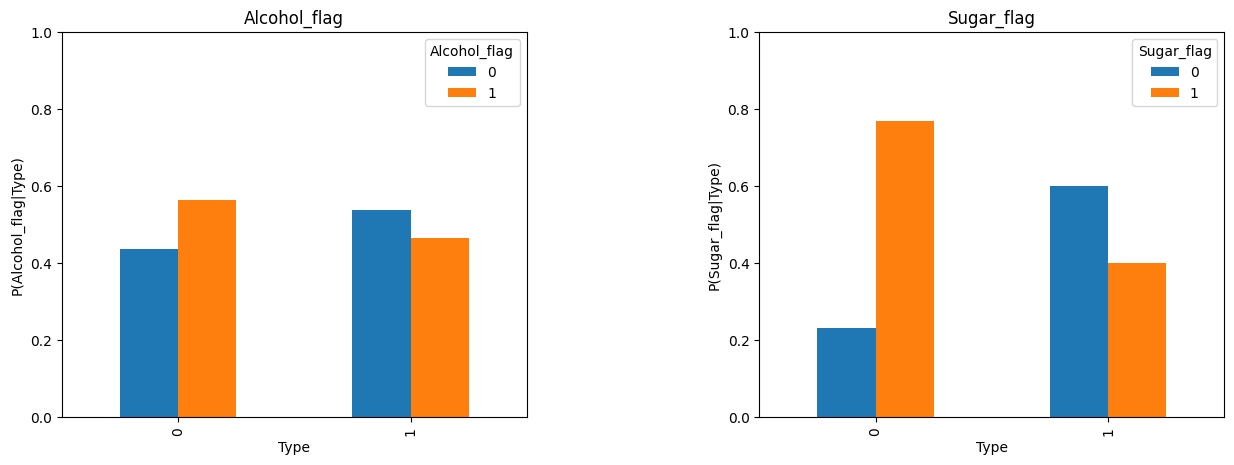

In [13]:
# import the graphing library
import matplotlib.pyplot as plt

# construct the data tables
t1_plot = pd.crosstab(wine_tr2['Type'], wine_tr2['Alcohol_flag'],margins=True, margins_name='Total', normalize='index')
t2_plot = pd.crosstab(wine_tr2['Type'], wine_tr2['Sugar_flag'],margins=True, margins_name='Total', normalize='index')
# create figure and axis
fig, (axis1, axis2) = plt.subplots(nrows=1, ncols=2)

# align y-axes
axis1.set_ylim(0.0, 1.0)
axis2.set_ylim(0.0, 1.0)

# set titles
axis1.set_title('Alcohol_flag')
axis2.set_title('Sugar_flag')
axis1.set_ylabel('P(Alcohol_flag|Type)')
axis2.set_ylabel('P(Sugar_flag|Type)')

# adjust padding between plots
plt.subplots_adjust(wspace=0.5)

# set figure width and height
fig.set_figheight(5)
fig.set_figwidth(15)

# plot the graphs on each individual axes
plot_alcohol = t1_plot.iloc[['0', '1']].plot.bar(ax=axis1)
plot_sugar = t2_plot.iloc[['0', '1']].plot.bar(ax=axis2)

- It seems our bar graph shows that our conditional probability results are similar red wine of high alcohol percentage is of lower probability to be selected compared to white wine with high alcohol percentage. The probability of selecting either wine type with lower alcohol percentage is about 50/50 matching our previous results.

- The bar graphs do seem to show a fair representation of the conditional probability outputs from above demostrating that selecting a high sugar red is in the minority 23% of the time. Also, selecting a white wine of high sugar content has a higher likelyhood as described by the conditional probability is shown in the graph. 

In [14]:
# use a contingency table to get the value of P(Type = Red| Alcohol_flag = Low AND Sugar_flag = High)
alcsugar_type_table = pd.crosstab([wine_tr2.Alcohol_flag, wine_tr2.Sugar_flag], wine_tr2.Type, margins=True, normalize='index')
alcsugar_type_table

Type                            0         1
Alcohol_flag Sugar_flag                    
0            0           0.275676  0.724324
             1           0.554817  0.445183
1            0           0.281385  0.718615
             1           0.766784  0.233216
All                      0.500000  0.500000

In [15]:
##Compute the posterior probability of Type = Red for a wine that is low in alcohol content and high in sugar content. 

Pred_given_lowAlc_highSug = [((prob_red* Lowalc_givenred * Highsugar_givenred)) / (prior_low_alc * prior_high_sugar) ]
print(f"P(Type = Red| Alcohol_flag = Low AND Sugar_flag = High): {(Pred_given_lowAlc_highSug)}")

P(Type = Red| Alcohol_flag = Low AND Sugar_flag = High): [0.30597126608799763]


In [16]:
##Compute the posterior probability of Type = White for the same wine.
Pwhite_given_lowAlc_highSug = [((prob_white* Lowalc_givenwhite * Highsugar_givenwhite)) / (prior_low_alc * prior_high_sugar) ]
print(f"P(Type = White| Alcohol_flag = Low AND Sugar_flag = High): {(Pwhite_given_lowAlc_highSug)}")


P(Type = White| Alcohol_flag = Low AND Sugar_flag = High): [0.6510026938042502]


In [17]:
#Use your answers to the previous exercise to determine which type, red or white, is more probable for a wine with low alcohol and high sugar content. 
#What would the Naïve Bayes classifier classify this wine as?

#Evaluate the Naïve Bayes model on the wines_test data set. Display the results in a contingency table. 
#Edit the row and column names of the table to make the table more readable. Include a total row and column.

# separate x and y for training

import pandas as pd
import numpy as np
from sklearn.naive_bayes import MultinomialNB 
import statsmodels.tools.tools as stattools

from re import X
## extract all columns from alcohol 

x_Alcohol_ind=np.array(wine_tr2['Alcohol_flag'])

#array below printed
x_Alcohol_ind

#for us to convert these into categorical values...

(x_Alcohol_ind, x_Alcohol_dict) = stattools.categorical(x_Alcohol_ind, drop= True, dictnames=True)
x_Alcohol_ind = pd.DataFrame(x_Alcohol_ind)
x_Alcohol_ind

x_Sugar_ind= np.array(wine_tr['Sugar_flag'])
(x_Sugar_ind, x_Sugar_ind_dict)=stattools.categorical(x_Sugar_ind, drop=True, dictnames=True)
x_Sugar_ind = pd.DataFrame(x_Sugar_ind)
x_Sugar_ind

X=pd.concat((x_Alcohol_ind, x_Sugar_ind), axis=1)

X

X2=pd.concat((wine_tr['Alcohol_flag'], wine_tr['Sugar_flag'], x_Alcohol_ind, x_Sugar_ind), axis=1)

X2

Y= wine_tr2['Type']

Y

nb_01 =MultinomialNB().fit(X.values,Y.values)

nb_01


/usr/local/lib/python3.10/dist-packages/statsmodels/tools/tools.py:152: FutureWarning: categorical is deprecated. Use pandas Categorical to represent categorical data and can get_dummies to construct dummy arrays. It will be removed after release 0.13.
  warnings.warn(


MultinomialNB()

In [18]:
x_Alcohol_ind_test=np.array(wine_test['Alcohol_flag'])
(x_Alcohol_ind_test, x_Alcohol_ind_dict_test)=stattools.categorical(x_Alcohol_ind_test, drop=True, dictnames=True)

x_Alcohol_ind_test=pd.DataFrame(x_Alcohol_ind_test)



x_Sugar_ind_test=np.array(wine_test['Sugar_flag'])
(x_Sugar_ind_test, x_Sugar_ind_dict_test)=stattools.categorical(x_Sugar_ind_test, drop=True, dictnames=True)
x_Sugar_ind_test=pd.DataFrame(x_Sugar_ind_test)

x_Sugar_ind

## The dummy variables for Alcohol flag and Sugar flag are coalesced into a single dataframe
X_test=pd.concat((x_Alcohol_ind_test, x_Sugar_ind_test), axis=1)

X_test


X2_test=pd.concat((wine_test['Alcohol_flag'], wine_test['Sugar_flag'], x_Alcohol_ind_test, x_Sugar_ind_test), axis=1)
X2_test

## in our matrix, we have 4 columns
## column 1 Alcohol High?
## column 2: Alcohol Low?
## column 3: Sugar high?
## column 4: sugal low?

## Our target variable is the wine type
Y_test=wine_test['Type']

Y_test

Y_predicted= nb_01.predict(X_test)

Y_predicted

### compare predictions vs actuals

ypred= pd.crosstab(wine_test['Type'], Y_predicted, rownames = ['Actual']
                   , colnames= ['Predicted'])
ypred['Total']= ypred.sum(axis=1);
ypred.loc['Total']= ypred.sum();
ypred


/usr/local/lib/python3.10/dist-packages/statsmodels/tools/tools.py:152: FutureWarning: categorical is deprecated. Use pandas Categorical to represent categorical data and can get_dummies to construct dummy arrays. It will be removed after release 0.13.
  warnings.warn(


Predicted,0,1,Total
Actual,,,
0,464,121,585
1,678,1082,1760
Total,1142,1203,2345


In [19]:
NB = GaussianNB()
nb_01 =NB.fit(X, Y)
y_predict = nb_01.predict(X_test)
print("Accuracy NB: {:.2f}".format(NB.score(X_test, Y_test)))


Accuracy NB: 0.66


In [20]:
#According to your table in the previous exercise, find the following values for the Naïve Bayes model:
#Accuracy = TP + TN / Total 
Accuracy =((1082+464)/ 2345)*100

print(f"Accuracy for the Naïve Bayes model is: {round(Accuracy)}%")

#Error Rate  = FP+ FN / Total
Error_rate = ((121+1142)/2345)*100
print(f"Error Rate for the Naïve Bayes model is: {round(Error_rate)}%")

Accuracy for the Naïve Bayes model is: 66%
Error Rate for the Naïve Bayes model is: 54%


In [21]:
#According to your contingency table, find the following values for the Naïve Bayes model:

#How often it correctly classifies red wines.
red_acc = ypred.iloc[0,0]/ypred.iloc[2,2]
print(red_acc)
#How often it correctly classifies white wines.
white_acc = ypred.iloc[1,1]/ypred.iloc[2,2]
print(white_acc)

0.1978678038379531
0.46140724946695094


Name a few classification algorithm, choose one and use it on a dataset of your choosing.
- Logistic regression, Naives Bayes, Decision Trees, Neural Networks


In [22]:
#logistic Regression

import numpy as np
import statsmodels.api as sm
from scipy import stats

import matplotlib.pyplot as plt 

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn import metrics


X_train = sm.add_constant(X)

X_train

model01=sm.OLS(Y, X_train).fit() 
##OLS stands for ordinary least squaures, which is the method used to fit this regression model. 

In [28]:
model01.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                   Type   R-squared:                       0.153
Model:                            OLS   Adj. R-squared:                  0.151
Method:                 Least Squares   F-statistic:                     90.00
Date:                Mon, 19 Jun 2023   Prob (F-statistic):           1.17e-36
Time:                        05:52:49   Log-Likelihood:                -642.81
No. Observations:                1000   AIC:                             1292.
Df Residuals:                     997   BIC:                             1306.
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       1.013e+13    7.1e+12      1.427      0.154    -3.8e+12    2.41e+13
0          -4.646e+12   3.26e+12     -1.427      0.154    -1.1e+13    1.74e+12
1          -4.646e+12   3.26e+12     -1.427      0.154    -1.1e+13    1.74e+12
0           -5.48e+12   3.84e+12     -1.427      0.154    -1.3e+13    2.06e+12
1           -5.48e+12   3.84e+12     -1.427      0.154    -1.3e+13    2.06e+12
==============================================================================
Omnibus:                     1680.976   Durbin-Watson:                   0.347
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               68.538
Skew:                           0.003   Prob(JB):                     1.31e-15
Kurtosis:                       1.717   Cond. No.                     2.54e+15
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The smallest eigenvalue is 3.13e-28. This might indicate that there are
strong multicollinearity problems or that the design matrix is singular.
"""

Apply ANN and decision tree algorithm on the wine dataset and compare the result? which one is better and why?
-It seems I got the same resuly of 66% accuracy for all my models which leads me to belive I may not have cleaned and prepared my data well enough to produce a stronger result. Although, this result may also indicate that this dataset does not have suffiecent data to produce a reliable result. 
- I think for this Wine data set given its size is relatively small decision trees algorithm would be the best method to use given it's a classification algorithm and can categorize the wines based on their traits. Decision trees are able to handle numerical and categorical data, and being a supervised learning method segmenting between red and white and the other characteristics. 

- The Artificial Neural Network (ANN) classifier is also a supervised learning method that can also be used as a classification machine learning algorithm. However, ANN is much better suited for data sets that are binary which is why I would go with decision tree algorithm even though ANN is a more powerful learning model. 



# Decision tree

In [23]:
### Show your Code Here ###
import pandas as pd
import numpy as np
import statsmodels.tools.tools as stattools
from sklearn.tree import DecisionTreeClassifier, export_graphviz
import requests

In [24]:
dt = DecisionTreeClassifier(criterion= 'gini', max_leaf_nodes=4)
dt.fit(X, Y)

DecisionTreeClassifier(max_leaf_nodes=4)

In [25]:
y_pred1 = dt.predict(X_test)
print(classification_report(Y_test, y_pred1))

              precision    recall  f1-score   support

           0       0.41      0.79      0.54       585
           1       0.90      0.61      0.73      1760

    accuracy                           0.66      2345
   macro avg       0.65      0.70      0.63      2345
weighted avg       0.78      0.66      0.68      2345



# Neural Network

In [26]:
from sklearn.neural_network import MLPClassifier
mlp = MLPClassifier(hidden_layer_sizes =(50,), max_iter=1000)
NNA =mlp.fit(X, Y)
y_pred2 = NNA.predict(X_test)
print("Accuracy MLP: {:.2f}".format(mlp.score(X_test, Y_test)))

Accuracy MLP: 0.66


In [27]:
from sklearn.metrics import classification_report, confusion_matrix
print(confusion_matrix(Y_test, y_pred2))
print(classification_report(Y_test, y_pred2))

[[ 464  121]
 [ 678 1082]]
              precision    recall  f1-score   support

           0       0.41      0.79      0.54       585
           1       0.90      0.61      0.73      1760

    accuracy                           0.66      2345
   macro avg       0.65      0.70      0.63      2345
weighted avg       0.78      0.66      0.68      2345

